# **With Pandas**

# **Import Libraries**

In [52]:
import numpy as np
import csv
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [53]:
path = "C:/Users/User/Desktop/Car-Sales/car_sales_data.csv"
df = pd.read_csv(path)
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [55]:
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [56]:
df.shape

(50000, 7)

In [57]:
df.isna().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

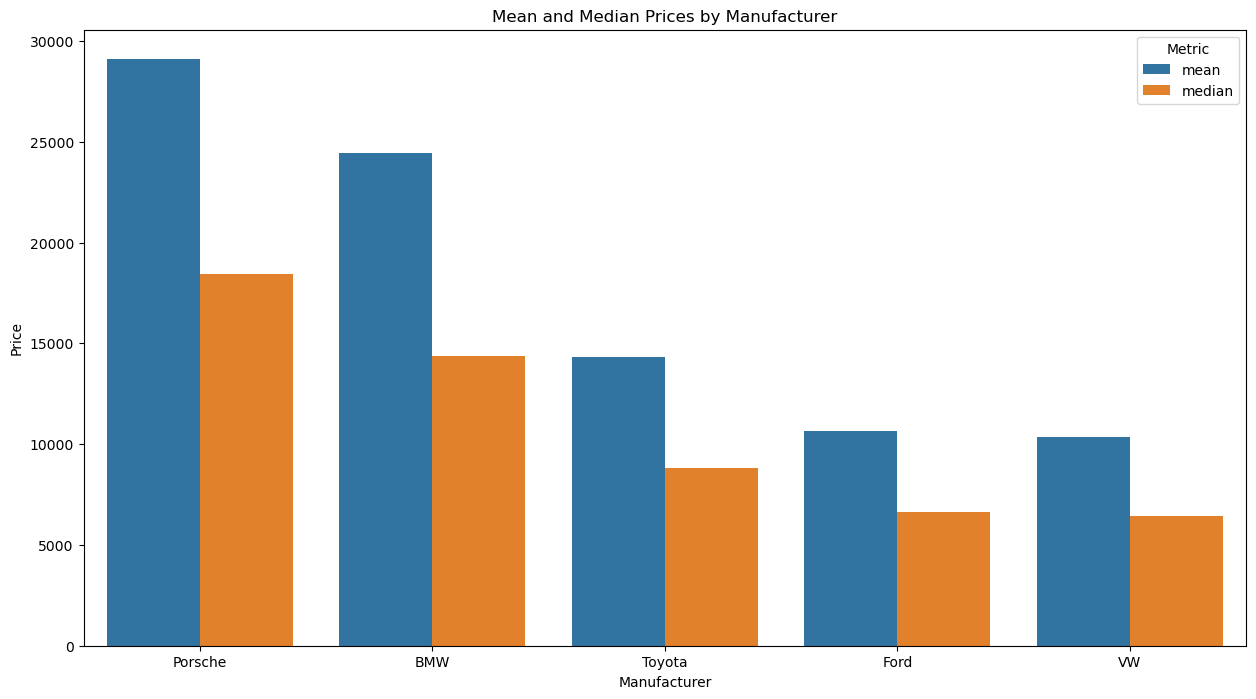

In [58]:
result = df.groupby("Manufacturer", as_index = False)["Price"].agg(["mean", "median"]).round(1).sort_values(by = "mean", ascending = False)
result_melted = result.melt(
    id_vars = "Manufacturer",
    var_name = "Metric",
    value_name= "Price"
)

plt.figure(figsize = (15,8))
sns.barplot(data = result_melted, x = "Manufacturer", y = "Price", hue = "Metric")
plt.title('Mean and Median Prices by Manufacturer')
plt.show()

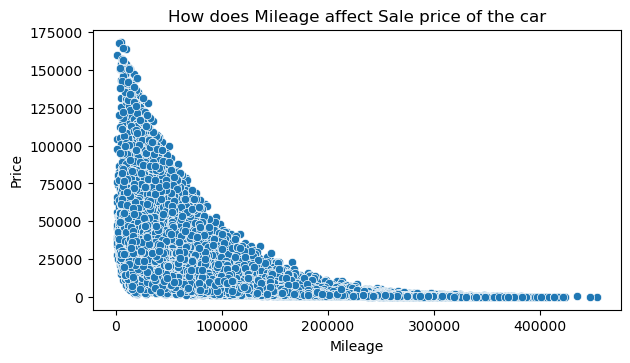

In [59]:
# Mileage vs Price
plt.figure(figsize = (15,8))
plt.subplot(221)
sns.scatterplot(data=df, x="Mileage", y="Price")
plt.title("How does Mileage affect Sale price of the car")
plt.show()

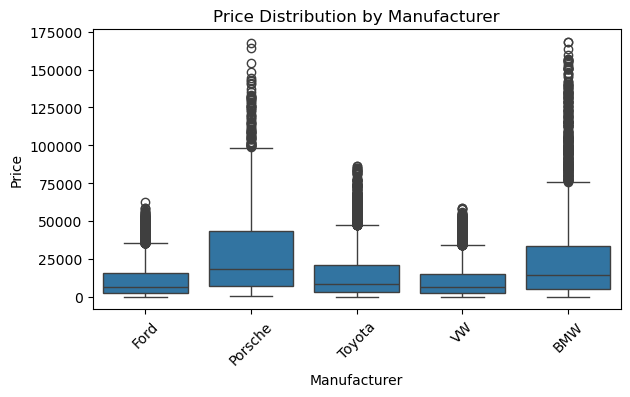

In [60]:
# Price by Manufacturer
plt.figure(figsize = (15,8))
plt.subplot(222)
sns.boxplot(data=df, x='Manufacturer', y='Price')
plt.xticks(rotation=45)
plt.title('Price Distribution by Manufacturer')
plt.show()

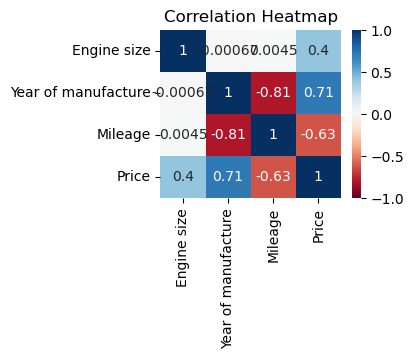

In [61]:
# Correlation heatmap
plt.subplot(223)
sns.heatmap(data=df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap="RdBu")
plt.title('Correlation Heatmap')
plt.show()

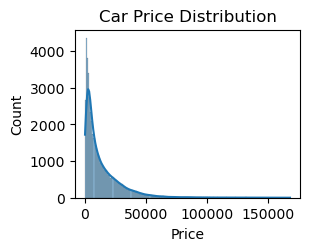

In [62]:
# Car Price Distribution
plt.subplot(224)
sns.histplot(data = df, x = "Price", kde = True,)
plt.title("Car Price Distribution")
plt.show()

# **Data Cleaning**

In [63]:
# Min and Max price
min = np.min(df['Price'])
max = np.max(df['Price'])
print("Min price:", min)
print("Max price:", max)

Min price: 76
Max price: 168081


In [64]:
df['Manufacturer_num'] = df['Manufacturer'].astype('category').cat.codes
df['Model_num'] = df['Model'].astype('category').cat.codes
df['Fuel_Type_num'] = df['Fuel type'].astype('category').cat.codes

In [65]:
df

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price,Manufacturer_num,Model_num,Fuel_Type_num
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074,1,3,2
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704,2,0,2
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072,1,7,0
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705,3,11,1
4,VW,Polo,1.0,Petrol,2006,127869,4101,4,9,2
...,...,...,...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,Petrol,2018,28664,113006,0,6,2
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430,3,10,1
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852,1,7,0
49998,Ford,Focus,1.0,Diesel,2016,26468,23630,1,4,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
 7   Manufacturer_num     50000 non-null  int8   
 8   Model_num            50000 non-null  int8   
 9   Fuel_Type_num        50000 non-null  int8   
dtypes: float64(1), int64(3), int8(3), object(3)
memory usage: 2.8+ MB


In [67]:
# ---- Outlier detection (IQR on Price) ----
Q1, Q3 = np.percentile(df['Price'], [25, 75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

outliers = df[(df['Price'] < lower) | (df['Price'] > upper)]
print("Outliers found:", len(outliers))

Outliers found: 2649


In [68]:
print("The Outliers:\n", outliers)

The Outliers:
       Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
1          Porsche  718 Cayman          4.0    Petrol                 2016   
18          Toyota        RAV4          2.0    Hybrid                 2018   
41             BMW          M5          4.0    Petrol                 2017   
51          Toyota        RAV4          2.4    Petrol                 2018   
57         Porsche     Cayenne          2.6    Diesel                 2015   
...            ...         ...          ...       ...                  ...   
49922          BMW          M5          4.0    Petrol                 2011   
49938          BMW          M5          4.0    Petrol                 2015   
49939       Toyota        RAV4          1.8    Hybrid                 2017   
49995          BMW          M5          5.0    Petrol                 2018   
49997         Ford      Mondeo          1.6    Diesel                 2022   

       Mileage   Price  Manufacturer_num  Model_

In [69]:
np.min(outliers['Price'])

42985

In [70]:
np.max(outliers['Price'])

168081

In [71]:
df_clean = df[(df['Price'] >= lower) & (df['Price'] <= upper)]

# **Modeling**

In [72]:
# Metric for evaluation
from sklearn.metrics import mean_squared_error

# Statsmodels for Linear Regression
import statsmodels.api as sm

Option 1: Without removing the outliers

In [73]:
# For Regression
X = df[['Engine size','Year of manufacture','Mileage','Fuel_Type_num','Manufacturer_num','Model_num']] # --> Features
y = df['Price'] # --> The Target

In [74]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (50000, 6)
y shape: (50000,)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Engine size,Year of manufacture,Mileage,Fuel_Type_num,Manufacturer_num,Model_num
39087,1.4,1990,143415,2,1,3
30893,1.0,1990,259900,2,4,9
45278,2.0,2006,106750,1,3,11
16398,1.8,2001,126649,1,3,11
13653,2.0,1992,66179,2,2,0
...,...,...,...,...,...,...
11284,1.2,1984,279567,1,3,13
44732,1.2,2010,108027,0,4,5
38158,2.0,2016,72963,0,4,8
860,2.4,1988,275595,0,0,12


In [76]:
# Adding constant to the X dataframe, for the intercept
X_train = sm.add_constant(X_train)
X_test  = sm.add_constant(X_test)
X_train

,const,Engine size,Year of manufacture,Mileage,Fuel_Type_num,Manufacturer_num,Model_num
39087,1.0,1.4,1990,143415,2,1,3
30893,1.0,1.0,1990,259900,2,4,9
45278,1.0,2.0,2006,106750,1,3,11
16398,1.0,1.8,2001,126649,1,3,11
13653,1.0,2.0,1992,66179,2,2,0
...,...,...,...,...,...,...,...
11284,1.0,1.2,1984,279567,1,3,13
44732,1.0,1.2,2010,108027,0,4,5
38158,1.0,2.0,2016,72963,0,4,8
860,1.0,2.4,1988,275595,0,0,12


In [77]:
# Fit OLS
model = sm.OLS(y_train, X_train)
results = model.fit()

In [78]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 1.423e+04
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:43:06   Log-Likelihood:            -4.2211e+05
No. Observations:               40000   AIC:                         8.442e+05
Df Residuals:                   39993   BIC:                         8.443e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.975e+06   1.64e+04   -120.402      0.000   -2.01e+06   -1.94e+06
Engine size          8957.0847     66.636    134.417      0.000    8826.476    9087.694
Year of manufacture   987.1211      8.136    121.327      0.000     971.174    1003.068
Mileage                -0.0380      0.001    -34.692      0.000      -0.040      -0.036
Fuel_Type_num        -422.0090     55.278     -7.634      0.000    -530.356    -313.662
Manufacturer_num       -5.2068     35.263     -0.148      0.883     -74.323      63.909
Model_num             -24.5754     13.466     -1.825      0.068     -50.970       1.819
==============================================================================
Omnibus:                    29269.407   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           878349.668
Skew:                           3.203   Prob(JB):                         0.00
Kurtosis:                      25.045   Cond. No.                     4.71e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
y_pred = results.predict(X_test) # Running predictions
rmse = mean_squared_error(y_test, y_pred) # Computing RMSE
print("Test RMSE:", np.sqrt(rmse))

Test RMSE: 9434.706421436285


In [80]:
y_pred_test = results.predict(X_test)
ss_res = np.sum((y_test - y_pred_test)**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
print("Test R²:", 1 - ss_res/ss_tot)

Test R²: 0.6719903658782866


Option 2: With removing the outliers

In [81]:
# For Regression
X_clean = df_clean[['Engine size','Year of manufacture','Mileage','Fuel_Type_num','Manufacturer_num','Model_num']] # --> Features
y_clean = df_clean['Price'] # --> The Target

In [82]:
print("X shape:", X_clean.shape)
print("y shape:", y_clean.shape)

X shape: (47351, 6)
y shape: (47351,)


In [83]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)
X_train2

,Engine size,Year of manufacture,Mileage,Fuel_Type_num,Manufacturer_num,Model_num
27354,4.0,2006,92118,2,0,6
24080,2.0,2005,116804,0,4,8
35480,1.0,2019,17949,0,1,3
5704,1.4,2018,32960,1,3,13
46748,1.0,2004,45775,2,4,9
...,...,...,...,...,...,...
11919,2.0,1993,175766,1,3,11
47240,2.0,1994,155467,0,1,7
40268,1.0,2003,30728,1,3,13
918,1.4,2017,34908,1,3,10


In [ ]:
# Adding constant to the X dataframe, for the intercept
X_train2 = sm.add_constant(X_train2)
X_test2  = sm.add_constant(X_test2)
X_train2

,const,Engine size,Year of manufacture,Mileage,Fuel_Type_num,Manufacturer_num,Model_num
27354,1.0,4.0,2006,92118,2,0,6
24080,1.0,2.0,2005,116804,0,4,8
35480,1.0,1.0,2019,17949,0,1,3
5704,1.0,1.4,2018,32960,1,3,13
46748,1.0,1.0,2004,45775,2,4,9
...,...,...,...,...,...,...,...
11919,1.0,2.0,1993,175766,1,3,11
47240,1.0,2.0,1994,155467,0,1,7
40268,1.0,1.0,2003,30728,1,3,13
918,1.0,1.4,2017,34908,1,3,10


In [ ]:
# Fit OLS
final_model = sm.OLS(y_train2, X_train2).fit()

In [ ]:
y_pred2 = final_model.predict(X_test2) # Running predictions
rmse2 = mean_squared_error(y_test2, y_pred2) # Computing RMSE
print("Test RMSE:", np.sqrt(rmse2))

Test RMSE: 4781.635005438407


In [90]:
y_pred2

30018     5442.890734
24468    14141.423910
15690    28375.806962
24814    12280.196820
40343    18534.427979
             ...     
6131     18003.323086
10084     6333.770171
6857     15724.565414
48354     5980.445225
31339     6782.974815
Length: 9471, dtype: float64

In [91]:
y_test2

30018     2790
24468    13991
15690    34732
24814     7164
40343    13869
         ...  
6131     11276
10084     4258
6857     11179
48354     4605
31339     4101
Name: Price, Length: 9471, dtype: int64

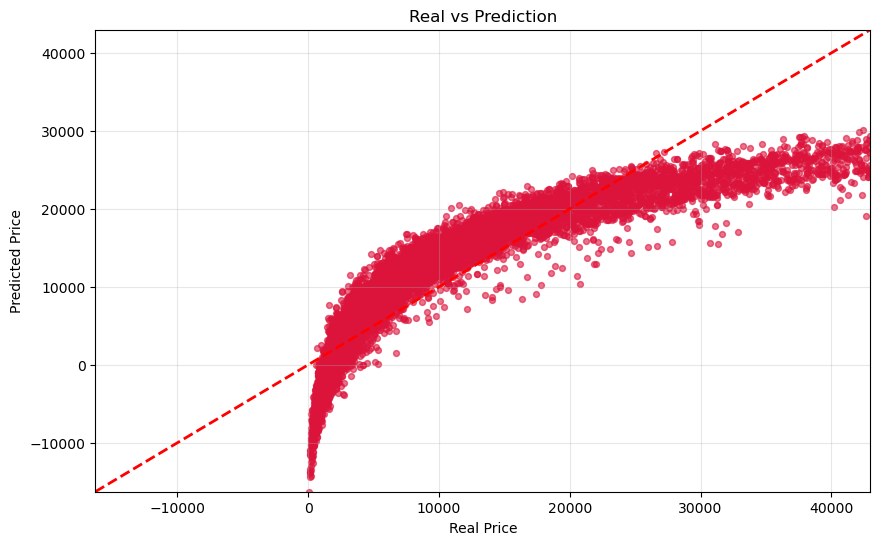

In [94]:
# Numpy array
y_true = np.asarray(y_test2) # the actual values
y_hat  = np.asarray(y_pred2) # the predicted 

# min & max 
xy_min = float(np.min([y_true.min(), y_hat.min()]))
xy_max = float(np.max([y_true.max(), y_hat.max()]))


# plot
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_hat, alpha=0.6, color="crimson", s=18)
plt.plot([xy_min, xy_max], [xy_min, xy_max], "r--", lw=2)  # 45° ref line
plt.xlim(xy_min, xy_max)
plt.ylim(xy_min, xy_max)
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.title("Real vs Prediction")
plt.grid(alpha=0.3)
plt.show()

In [41]:
def predict_price(engine_size, year, mileage, fuel_type, manufacturer, model):
    # make dictionaries that convert category text --> numeric codes
    fuel_map = {cat: code for code, cat in enumerate(df['Fuel type'].astype('category').cat.categories)}
    manu_map = {cat: code for code, cat in enumerate(df['Manufacturer'].astype('category').cat.categories)}
    model_map = {cat: code for code, cat in enumerate(df['Model'].astype('category').cat.categories)}

    # change user input (text) into same numbers we used in training
    fuel_val = fuel_map.get(fuel_type, 0)      # example: Petrol --> 2
    manu_val = manu_map.get(manufacturer, 0)
    model_val = model_map.get(model, 0)

    # put features together into one row (1.0 > intercept)
    x_new = np.array([[1.0, engine_size, year, mileage, fuel_val, manu_val, model_val]])

    # run prediction
    pred = final_model.predict(x_new)[0]

    return pred

In [42]:
# Example 1
pred_price = predict_price(
    engine_size=2.0,
    year=2018,
    mileage=50000,
    fuel_type="Petrol",
    manufacturer="Ford",
    model="Fiesta"
)

print("\nPredicted Price Example:", round(pred_price, 2))


Predicted Price Example: 24356.12


In [43]:
# Example 2
pred_price = predict_price(
    engine_size=1.4,
    year=2017,
    mileage=44516,
    fuel_type="Hybrid",
    manufacturer="Toyota",
    model="Yaris"
)

print("\nPredicted Price Example:", round(pred_price, 2))


Predicted Price Example: 22828.99


In [ ]:
import pickle

with open("car_price_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

In [50]:
with open("car_price_model_WithOutliers.pkl", "wb") as f:
    pickle.dump(results, f)